# Tutorial. Finite difference methods for stationary elliptic equations

Second-order linear partial differential equations are classified as either [elliptic](https://en.wikipedia.org/wiki/Elliptic_partial_differential_equation), [hyperbolic](https://en.wikipedia.org/wiki/Hyperbolic_partial_differential_equation), or [parabolic](https://en.wikipedia.org/wiki/Parabolic_partial_differential_equation), this naming convention being inspired by the classification of [conic sections](https://en.wikipedia.org/wiki/Conic_section) or [quadratic forms](https://en.wikipedia.org/wiki/Quadratic_form).

The simplest examples of elliptic partial differential equations are the [Laplace equation](https://en.wikipedia.org/wiki/Laplace_equation) (written here in two space dimensions),
$$
-\Delta u(x,y)=-\frac{\partial^2u}{\partial x^2}(x,y)-\frac{\partial^2u}{\partial y^2}(x,y)=0,
$$
and the [Poisson equation](https://en.wikipedia.org/wiki/Poisson_equation),
$$
-\Delta u(x,y)=-\frac{\partial^2u}{\partial x^2}(x,y)-\frac{\partial^2u}{\partial y^2}(x,y)=f(x,y),
$$
where $f$ is a given function.

In this notebook, we are interested in the numerical solution of the Poisson equation by [finite difference methods](https://en.wikipedia.org/wiki/Finite_difference_method).

The <tt>numpy</tt> and <tt>matplotlib</tt> packages will be needed, as well as the `linalg` library of <tt>scipy</tt> (in order to solve linear systems of algebraic equations).

In [1]:
import numpy as np

# To draw matplotlib plots within this notebook.
%matplotlib inline
import matplotlib.pyplot as plt
from python_code.nord_cmap import *
import scipy.linalg as linalg

## Exercise 1. The Poisson equation in 1D.
### Part 1. Homogeneous Dirichlet boundary conditions
We first consider the numerical solution, by the finite difference method, of the following boundary value problem for the Poisson equation in one space dimension completed by homogeneous Dirichlet boundary conditions:
$$
\left\{\begin{align*}
&-u''(x)=f(x),\ x\in(a,b),\\
&u(a)=0,\ u(b)=0,
\end{align*}\right.
$$
where $a$ and $b$ are real numbers, such that $a<b$, and $f$ is a given function of class $\mathscr{C}^2$.

The finite difference method for the solution of this problem consists in computing some real numbers $u_0,\dots,u_N$, $N$ being a given non-zero natural integer, solution to a system of algebraic equations or *scheme*, for instance
$$
\left\{\begin{align*}
&-\frac{1}{(\Delta x)^2}(u_{j+1}−2\,u_j+u_{j−1})=f(x_j),\  j=1,\dots,N-1,\\
&u_0=u_N=0,
\end{align*}\right.
$$
where $\Delta x=\frac{b-a}{N}$ is the (uniform) grid spacing and $x_j=a+j(\Delta x)$, $j=0,\dots,N$, are the gridpoints. The quantities $u_0,\dots,u_N$ are meant to be approximations of the values $u(x_0),\dots,u(x_N)$ of the solution to the problem at the gridpoints $x_0,\dots,x_N$. 

When $N>2$, by setting $U=\begin{pmatrix}u_1\\\vdots\\u_{N-1}\end{pmatrix}$ and $B=\begin{pmatrix}f(x_1)\\\vdots\\f(x_{N-1})\end{pmatrix}$, the last system can be written in matrix form:
$$
\left\{\begin{align*}
&AU=B,\\
&u_0=u_N=0,
\end{align*}\right.
$$
where the matrix
$$
A=\frac{1}{(\Delta x)^2}\begin{pmatrix}2&-1&0&\dots&\dots&0\\-1&2&-1&\ddots&&\vdots\\0&\ddots&\ddots&\ddots&\ddots&\vdots\\\vdots&\ddots&\ddots&\ddots&\ddots&0\\\vdots&&\ddots&-1&2&-1\\0&\dots&\dots&0&-1&2\end{pmatrix}
$$
belongs to $M_{N-1}(\mathbb{R})$ (note here that the unknowns for which the value is readily known, $u_0$ and $u_N$, have been ''eliminated'' from the matrix equation).

In this part, we set $a=0$, $b=1$, and $f(x)=(2\pi)^2\sin(2\pi x)$, so that the solution to the above boundary value problem is
$$
u(x)=\sin(2\pi x).
$$

**Question.** Write a function computing the matrix $A$ defined above, the non-zero natural integer $N$ being an input argument.

In [2]:
a = 0
b = 1

In [3]:


def compute_system(N) : 
    
    Delta_X = (b - a) / N
    
    diag_1 = [-1 for k in range(N-1)]; diag_2 = [2 for k in range(N)]; diag_3 = [-1 for k in range(N-1)]
    
    M = np.diag(diag_1, -1) + np.diag(diag_2, 0) + np.diag(diag_3, 1)
    
    return 1 / Delta_X ** 2 * M

A = compute_system(5)
    
    
    

In [4]:
A

array([[ 50., -25.,   0.,   0.,   0.],
       [-25.,  50., -25.,   0.,   0.],
       [  0., -25.,  50., -25.,   0.],
       [  0.,   0., -25.,  50., -25.],
       [  0.,   0.,   0., -25.,  50.]])

**Question.** Choosing $N=50$, write a program computing the corresponding approximation to the solution of the Poisson problem using the finite difference method introduced above and the function written in the previous question. The resulting linear system will be solved using a [LU decomposition](https://en.wikipedia.org/wiki/LU_decomposition) of the matrix $A$, which can be done with `linalg.lu_factor` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html)) and `linalg.lu_solve` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html)) functions available in <tt>scipy</tt> (the more efficient [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) could also be used, see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cho_factor.html), since the matrix is symmetric positive definite). Use this program to plot in the same figure the graph of the analytical solution and its numerical approximation.

In [5]:
from scipy.linalg import lu_factor, lu_solve

In [6]:
def finite_difference_method(B) : 
    
    A = compute_system(len(B))
    lu, piv = lu_factor(A)
    U = lu_solve((lu, piv), B)
    
    return U

In [7]:
X = np.linspace(0,1,50)
B = np.sin(2 * np.pi * X) * (2 * np.pi) ** 2

U = finite_difference_method(B[1:-1])
U = np.array([0, *U, 0])

Text(0, 0.5, 'u')

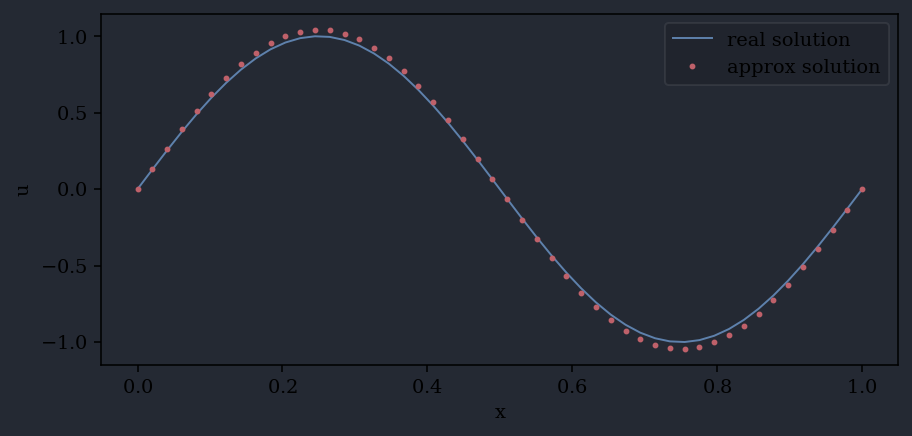

In [8]:
fig, ax = plt.subplots()
color = color_list(2)

ax.plot(X, np.sin(2 * np.pi * X), color = color[0], lw = 1, label = 'real solution')
ax.plot(X, U,  'o', lw = 1,color = color[1], label = 'approx solution', markersize = 2)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')

We say that the finite difference scheme converges in the supremum norm if the discrete approximation $u_0,\dots,u_N$ is such that:
$$
\lim_{\Delta x\to0}\left(\max_{j=0,\dots,N}|u(x_j)−u_j|\right)=0.
$$

**Question.** For the successive choices $N=2^k$, $k=2,\dots,10$, compute and plot in the same figure the absolute values of the differences between the values of the solution at the gridpoints and their discrete approximations. Comment.

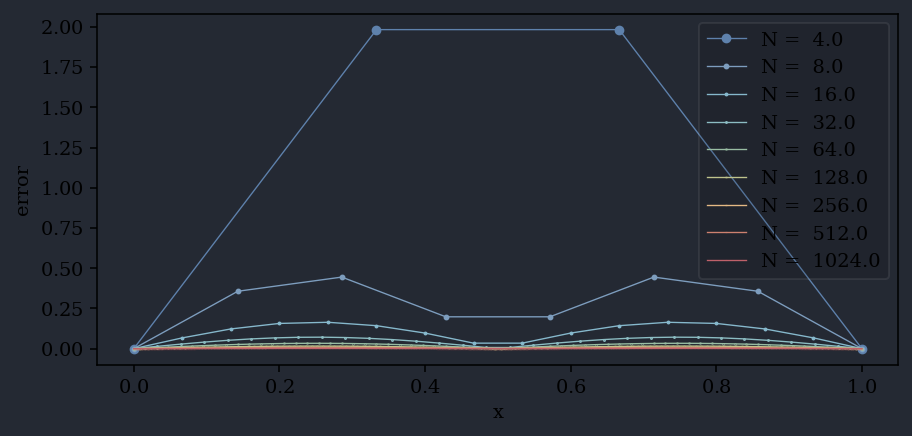

In [9]:
N = [2**k for k in range(2,11)]
fig, ax = plt.subplots()
color = color_list(9)

for k , num in enumerate(N) : 
    
    X = np.linspace(0,1,num)
    B = np.sin(2 * np.pi * X) * (2 * np.pi) ** 2

    U = finite_difference_method(B[1:-1])
    U = np.array([0, *U, 0])
    
    ax.plot(X, np.abs(U - B / (2 * np.pi) ** 2), 'o-', lw = .7, color = color[k], label = f'N = {num : .1f}', markersize = 16/num)

ax.set_xlabel('x')
ax.set_ylabel('error')

ax.legend()
    
    
    
    
    
    
    

**Answer.**

The grid spacing $\Delta x$ being fixed, we denote by
$$
e_{\Delta x}=\max_{j=0,\dots,N}|u(x_j)−u_j|
$$
the global error of the scheme associated with the spacing $\Delta x$. The convergence of the method then implies that
$$
\lim_{\Delta x\to 0}e_{\Delta x}=0.
$$

For the above scheme, it can be shown that the convergence rate is at least of order two, that is, there exists a positive constant $C$, which does not depend on $\Delta x$, such that
$$
e_{\Delta x}\leq C\,(\Delta x)^2.
$$

**Question.** Compute, for each value of $\Delta x$ associated to a value of $N=2^k$, $k=2,\dots,10$, the global error of the method (this can be done by adding a few lines of code in the previously written program). Plot, in a single figure and using logarithmic scales, the global error as a function of the grid spacing, as well a straight line with slope equal to $2$ for comparison purposes. Comment.

In [10]:
N = np.array([2**k for k in range(2,11)])
error = []
for num in N : 
    
    X = np.linspace(0,1,num)
    B = np.sin(2 * np.pi * X) * (2 * np.pi) ** 2

    U = finite_difference_method(B[1:-1])
    U = np.array([0, *U, 0])
    
    error.append(np.max(np.abs(U - B / (2 * np.pi) ** 2)))


/tmp/ipykernel_24564/2594254843.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(1/N, error ,'o',  color = color[-1], marker = '+')


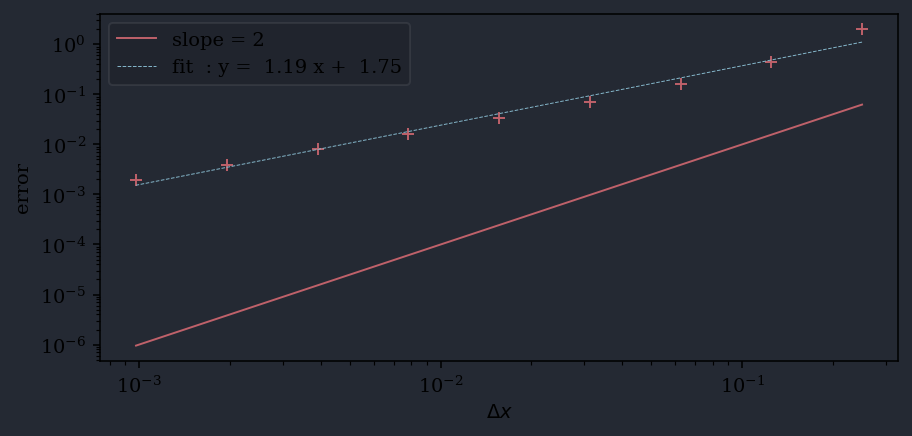

In [11]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(1/N, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(0)*((Delta_X) ** (2)), '-', color = color[8],lw = 1, label = 'slope = 2')
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[2], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()


**Answer.**

### Part 2. Non-homogeneous Dirichlet boundary conditions
We now consider the Poisson equation completed with non-homogeneous Dirichlet boundary conditions:
$$
\left\{\begin{align*}
&-u''(x)=f(x),\ x\in(a,b),\\
&u(a)=\alpha,\ u(b)=\beta,
\end{align*}\right.
$$
where $\alpha$ and $\beta$ are two given non-zero real numbers. To approximate the solution to this boundary-value problem, the previous finite difference scheme is used.

**Question.** Explain what are the modifications to the linear algebraic system to solve entailed by the changes in the boundary conditions of the problem compared to the homogeneous case.

**Answer.**

**Question.** On the model of the previous one, write a program computing an approximation of the solution to the following Poisson problem 
$$
\left\{\begin{align*}
&-u''(x)=-\frac{2}{(1+x)^3},\ x\in(1,2),\\
&u(1)=\frac{1}{2},\ u(2)=\frac{1}{3},
\end{align*}\right.
$$
which is given by
$$
u(x)=\frac{1}{1+x}.
$$
Plot in the same figure the graph of the solution and its numerical approximation, and illustrate the convergence of the scheme in another figure. Comment.

In [12]:
X = np.linspace(1,2,50)
B = - 2 / (1 + X) ** 3

B[1] += 1/2 * 48 ** 2
B[-2] += 1/3 * 48 ** 2

U = finite_difference_method(B[1:-1])
U = np.array([1/2, *U, 1/3])

Text(0, 0.5, 'u')

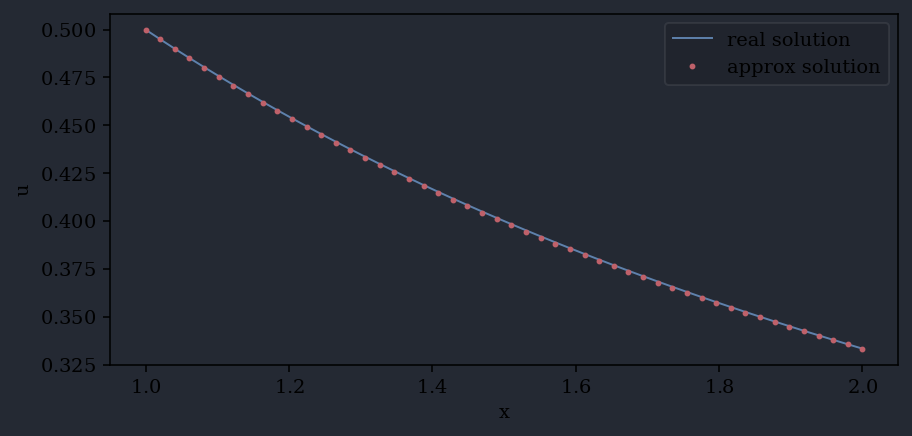

In [13]:
fig, ax = plt.subplots()
color = color_list(2)

ax.plot(X, 1 / (1 + X), color = color[0], lw = 1, label = 'real solution')
ax.plot(X, U,  'o', lw = 1,color = color[1], label = 'approx solution', markersize = 2)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')

In [14]:
N = np.array([2**k for k in range(2,11)])
error = []
for num in N : 
    
    X = np.linspace(1,2,num)
    B = - 2 / (1 + X) ** 3

    B[1] += 1/2 * (num - 2) ** 2
    B[-2] += 1/3 * (num - 2) ** 2

    U = finite_difference_method(B[1:-1])
    U = np.array([1/2, *U, 1/3])
    
    error.append(np.max(np.abs(U - 1/(1+X))))

/tmp/ipykernel_24564/1471044624.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')


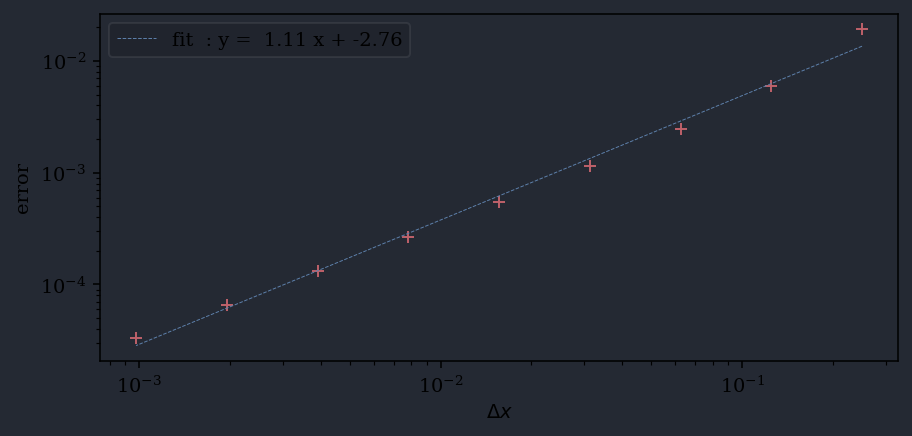

In [15]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()

**Answer.**

We next consider the following Dirichlet-Poisson problem:
$$
\left\{\begin{align*}
&-u''(x)=1,\ x\in(1,2),\\
&u(1)=1,\ u(2)=2.
\end{align*}\right.
$$

**Question.** Determine the solution to this problem.

**Answer.**

**Question.** Write a program computing an approximation to the solution of the problem based on the finite difference scheme previously considered. Plot in the same figure the graph of the solution and its numerical approximation, and illustrate the convergence of the method in another figure. Comment.

In [16]:
X = np.linspace(1,2,50)
B = np.ones(shape = 50)

B[1] += 1 * 48 ** 2
B[-2] += 2 * 48 ** 2

U = finite_difference_method(B[1:-1])
U = np.array([1, *U, 2])

Text(0, 0.5, 'u')

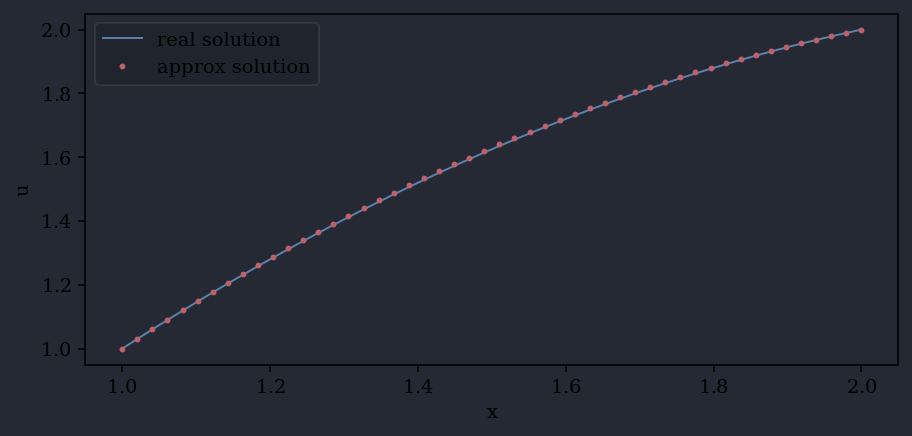

In [17]:
fig, ax = plt.subplots()
color = color_list(2)

ax.plot(X, - 1/2 * X **2 + 5/2 * X - 1, color = color[0], lw = 1, label = 'real solution')
ax.plot(X, U,  'o', lw = 1,color = color[1], label = 'approx solution', markersize = 2)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')

In [18]:
N = np.array([2**k for k in range(2,11)])
error = []
for num in N : 
    
    X = np.linspace(1,2,num)
    B = np.ones(shape = num)

    B[1] += 1 * (num-2) ** 2
    B[-2] += 2 * (num-2) ** 2

    U = finite_difference_method(B[1:-1])
    U = np.array([1, *U, 2])
    
    error.append(np.max(np.abs(U - ( - 1/2 * X **2 + 5/2 * X - 1))))

/tmp/ipykernel_24564/1471044624.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')


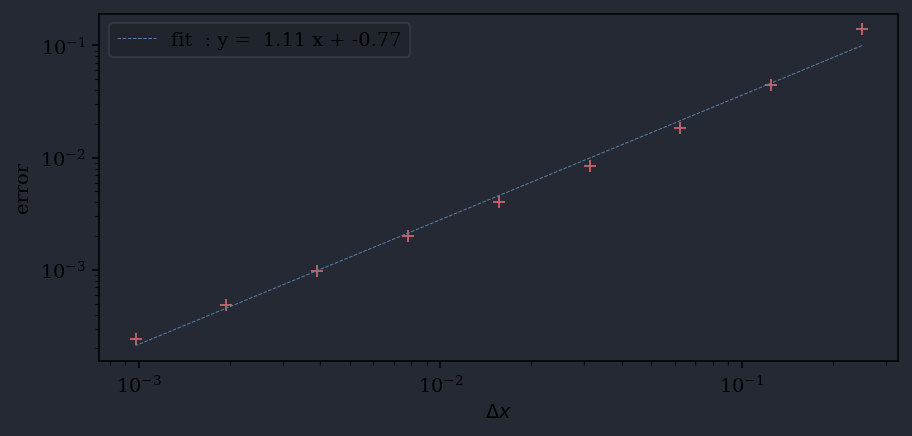

In [19]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()

**Answer.**

**Question.** Explain why this case is different from the previous ones.

**Answer.**

### Part 3. Homogeneous Neumann boundary conditions

We finally consider the following boundary-value problem:
$$
\left\{\begin{align*}
&-u''(x)+u(x)=f(x),\ x\in(a,b),\\
&u'(a)=0,\ u'(b)=0,
\end{align*}\right.
$$
in which the boundary conditions are homogeneous Neumann ones.

### A first approach.
We keep using the discretisation based on an uniform grid of the interval $(a,b)$ employed in the first parts of the exercise. To approximate the values of the first derivative at the endpoints in this setting, one can naturally employ the following, respectively forward and backward, finite difference formulas:
$$
u'(a)\simeq\frac{u(a+\Delta x)−u(a)}{\Delta x},\ u'(b)\simeq\frac{u(b)−u(b-\Delta x)}{\Delta x},
$$
leading to the scheme:
$$
\left\{\begin{align*}
&\frac{1}{\Delta x^2}(u_{j-1}-2\,u_j+u_{j+1})+u_j=f(x_j),\ j=1,\dots,N-1,\\
&\frac{u_1−u_0}{\Delta x}=0,\ \frac{u_N−u_{N-1}}{\Delta x}=0.
\end{align*}\right.
$$

This linar system of algebraic equations can be be written in the matrix form as
$$
\left\{\begin{align*}
&(\tilde{A}+I_{N-1})U=B\\
&u_0=u_1,\ u_N=u_{N-1},
\end{align*}\right.
$$
where $\tilde{A}$ is a matrix of order $N-1$, $I_{N-1}$ is the identity matrix of order $N-1$, $U=\begin{pmatrix}u_1\\\vdots\\u_{N-1}\end{pmatrix}$, and $B=\begin{pmatrix}f(x_1)\\\vdots\\f(x_{N-1})\end{pmatrix}$.

**Question.** Determine the matrix $\tilde{A}$ and write a function which computes it, the non-zero natural integer $N$ being an input argument.

**Answer.**

We have : 

$$\tilde{A}=\frac{1}{(\Delta x)^2}\begin{pmatrix}1&-1&0&\dots&\dots&0\\-1&2&-1&\ddots&&\vdots\\0&\ddots&\ddots&\ddots&\ddots&\vdots\\\vdots&\ddots&\ddots&\ddots&\ddots&0\\\vdots&&\ddots&-1&2&-1\\0&\dots&\dots&0&-1&1\end{pmatrix}
$$

In [20]:
a = 0 ; b = 1

In [21]:

def compute_Neumann(N) : 
    
    Delta_X = (b - a) / N 
    
    diag_1 = [-1 for k in range(N - 1)]; diag_2 = [2 for k in range(N)]; diag_3 = [-1 for k in range(N - 1)]
    
    M = np.diag(diag_1, -1) + np.diag(diag_2, 0) + np.diag(diag_3, 1)
    
    M[0,0] = 1
    M[-1,-1] = 1
    return 1 / Delta_X ** 2 * M


We now set $a=0$, $b=1$, and $f(x)=((2\pi)^2+1)\cos(2\pi x)$, so that the solution of the above problem is given by
$$
u(x)=\cos(2\pi x).
$$

**Question.** Write a program computing an approximation to the solution of the problem based on the above finite difference scheme. For $N=100$, plot in the same figure the graph of the solution and its numerical approximation.

In [22]:
def finite_difference_neumann(B) : 
    
    A = compute_Neumann(len(B)) + np.identity(len(B))
    lu, piv = lu_factor(A)
    U = lu_solve((lu, piv), B)
    
    return U

In [23]:
X = np.linspace(0,1,100)
B = ((2*np.pi) ** 2 + 1) * np.cos(2 * np.pi * X)


U = finite_difference_neumann(B[1:-1])

U = np.array([U[0], *U, U[-1]])

Text(0, 0.5, 'u')

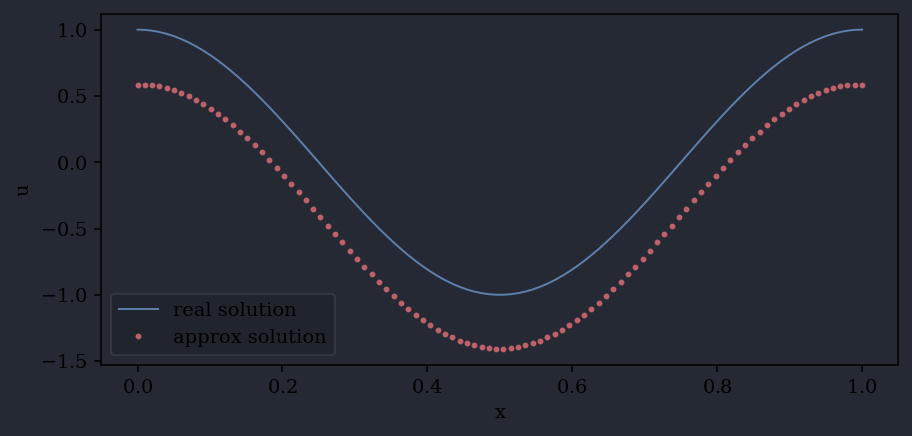

In [24]:
fig, ax = plt.subplots()
color = color_list(2)

ax.plot(X, np.cos(2 * np.pi * X), color = color[0], lw = 1, label = 'real solution')
ax.plot(X, U,  'o', lw = 1,color = color[1], label = 'approx solution', markersize = 2)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')

**Question.** Illustrate the convergence of the method in a figure. What is the effective rate of convergence of the method?

In [25]:
N = np.array([2**k for k in range(2,13)])
error = []
for num in N : 
    
    X = np.linspace(0,1,num)
    B = ((2*np.pi) ** 2 + 1) * np.cos(2 * np.pi * X)


    U = finite_difference_neumann(B[1:-1])

    U = np.array([U[0], *U, U[-1]])
    
    error.append(np.max(np.abs(U - np.cos(2 * np.pi * X))))

/tmp/ipykernel_24564/1471044624.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')


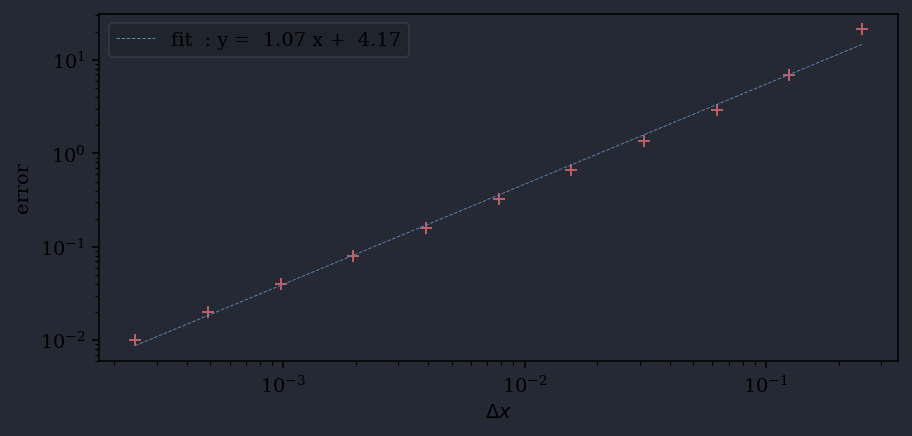

In [26]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()

**Answer.**

### Second-order approximation of the boundary conditions.

**Question.** Using the expansion $u(a+\Delta x)=u(a)+\Delta xu'(a)+\frac{(\Delta x)^2}{2}u''(a)+O((\Delta x)^3)$, rewritten as
$$
u'(a)=\frac{1}{\Delta x}\left(u(a+\Delta x)−u(a)-\frac{(\Delta x)^2}{2}u''(a)\right)+O((\Delta x)^2)=\frac{1}{\Delta x}(u(a+\Delta x)−u(a))+\frac{\Delta x}{2}(f(a)−u(a))+O((\Delta x)^2),
$$
devise a second-order approximation for the boundary condition $u'(a)=0$. Do the same for the remaining boundary condition and write the resulting scheme into an explicit matrix form.

**Answer.**

leading to the scheme:
$$
\left\{\begin{align*}
&\frac{1}{\Delta x^2}( u_1 \, [2 - (\frac{1}{{\Delta x}^2} + \frac{1}{2})] + u_{2})+u_1=f(x_1),\\
&\frac{1}{\Delta x^2}( u_{n-1} \, [2 - (\frac{1}{{\Delta x}^2} + \frac{1}{2})] + u_{n-2})+u_{n-1}=f(x_{n-1}).
\end{align*}\right.
$$

**Question.** Write a program computing an approximation to the solution of the problem based on this new scheme and verify that it is effectively of order $2$.

In [27]:
def compute_second_order_Neumann(N) : 
    
    Delta_X = (b - a) / N 
    
    diag_1 = [-1 for k in range(N - 1)]; diag_2 = [2 for k in range(N)]; diag_3 = [-1 for k in range(N - 1)]
    
    M = np.diag(diag_1, -1) + np.diag(diag_2, 0) + np.diag(diag_3, 1)
    
    factor = 1/Delta_X / (1 / Delta_X + Delta_X / 2)
    M[0,0] = 2 - factor
    M[-1,-1] = 2 - factor
    return 1 / Delta_X ** 2 * M

In [28]:
def finite_difference_neumann(B) : 
    
    A = compute_second_order_Neumann(len(B)) + np.identity(len(B))
    lu, piv = lu_factor(A)
    U = lu_solve((lu, piv), B)
    
    return U

In [29]:
X = np.linspace(0,1,100)
Delta_X = (b - a) / 100
factor = 1 / Delta_X + Delta_X / 2
B = ((2*np.pi) ** 2 + 1) * np.cos(2 * np.pi * X)

B[1] += (1 / (2 * Delta_X) ) / factor * B[0]
B[-2] += (1 / (2 * Delta_X) ) / factor * B[-1]

U = finite_difference_neumann(B[1:-1])

U = np.array([U[0], *U, U[-1]])

Text(0, 0.5, 'u')

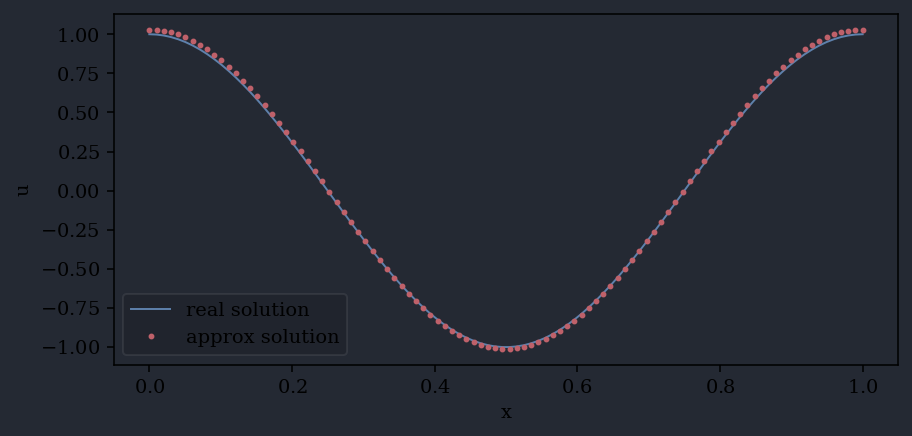

In [30]:
fig, ax = plt.subplots()
color = color_list(2)

ax.plot(X, np.cos(2 * np.pi * X), color = color[0], lw = 1, label = 'real solution')
ax.plot(X, U,  'o', lw = 1,color = color[1], label = 'approx solution', markersize = 2)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')

In [31]:
N = np.array([2**k for k in range(2,13)])
error = []
for num in N : 
    
    X = np.linspace(0,1,num)
    Delta_X = (b - a) / num
    factor = 1 / Delta_X + Delta_X / 2
    B = ((2*np.pi) ** 2 + 1) * np.cos(2 * np.pi * X)

    B[1] += (1 / (2 * Delta_X) ) / factor * B[0]
    B[-2] += (1 / (2 * Delta_X) ) / factor * B[-1]

    U = finite_difference_neumann(B[1:-1])

    U = np.array([U[0], *U, U[-1]])
    
    error.append(np.max(np.abs(U - np.cos(2 * np.pi * X))))

/tmp/ipykernel_24564/1471044624.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')


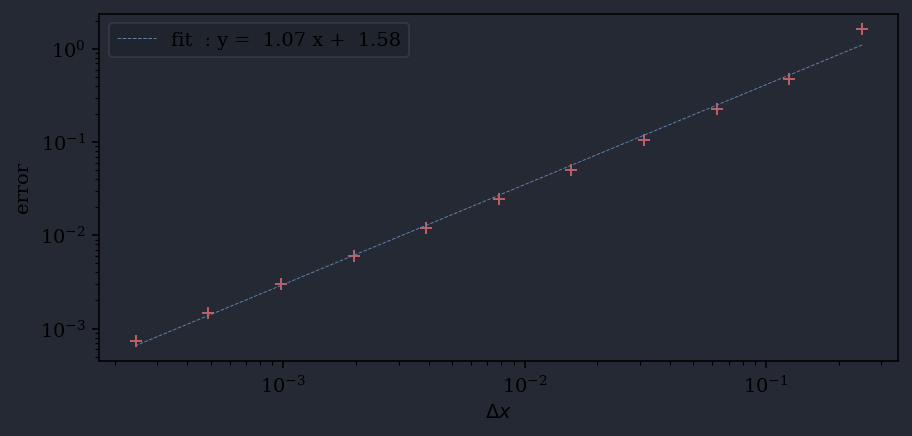

In [32]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()

## Exercise 2. The Poisson equation in 2D.

We are interested in the numerical solution by a finite difference scheme of a boundary-value problem for the Poisson equation, completed by an homogeneous Dirichlet boundary condition, in a square domain of $\mathbb{R}^2$:
$$
\left\{\begin{align*}
&-\Delta u=f\text{ in }\Omega,\\
&u=0\text{ on }\partial\Omega,
\end{align*}\right.
$$
where $\Omega=(a,b)\times(a,b)\subset\mathbb{R}^2$ ans $f:\Omega\to\mathbb{R}$ is a given function of class $\mathscr{C}^2$. 

To do so, the domain $\Omega$ is replaced by a discretisation grid with uniform spacing $\Delta x=\Delta y=\frac{b−a}{N}=h$ in both space directions, with $N$ a given non-zero natural integer, by setting
$$
x_i=a+ih,\ i=1,\dots,N,\text{ and }y_j=a+jh,\ j=0,\dots,N.
$$
Note here that the gridpoints $(x_i,y_j)$ with indices $i$ and $j$ in $1,\dots,N-1$ are interior points of the domain.

The Laplace operator is then approximated by a finite difference with a five-point stencil at each of the interior gridpoints, that is
$$
\Delta u(x_i,y_j)\simeq\frac{1}{h^2}\left(u(x_{i+1},y_j)+u(x_{i−1},y_j)+u(x_i,y_{j+1})+u(x_i,y_{j−1})-4u(x_i,y_j)\right),\ i=1,\dots,N-1,\ j=1,\dots,N-1.
$$
the values of the approximation at the gridpoints on the boundary $\partial\Omega$ being equal to $0$.

In order to write the linear system resulting from this scheme, it is necessary to number the gridpoints. We use the following convention: $P_1=(x_1,y_1), P_2=(x_2,y_1),\dots, P_{N-1}=(x_{N-1},y_1), P_N=(x_1,y_2),\dots, P_{(N-1)^2}=(x_{N-1},y_{N-1})$. We then denote by $u_i$ the approximate value of the solution at point $P_i$, $i=1,\dots,(N-1)^2$.

**Question.** Write the algebraic equation satisfied by the approximation of the solution at an interior gridpoint of the domain $\Omega$, using only the index of the gridpoint numbering. Check that the linear system of $(N-1)^2$ equations can be written in the form $AU=B$, where $A$ is a symmetric matrix of order $(N-1)^2\times(N-1)^2$ which as the following block partition
$$
A=-\frac{1}{h^2}\begin{pmatrix}C&I_{N-1}\\I_{N-1}&C&\ddots\\&\ddots&\ddots&\ddots\\&&\ddots&C&I_{N-1}\\&&&I_{N-1}&C\end{pmatrix}
$$
with $I_{N-1}$ the identity matrix of order $N-1$ and $C$ the tridiagonal matrix of order $N-1$ defined by
$$
C=\begin{pmatrix}-4&1&0&\dots&\dots&0\\1&-4&-1&\ddots&&\vdots\\0&\ddots&\ddots&\ddots&\ddots&\vdots\\\vdots&\ddots&\ddots&\ddots&\ddots&0\\\vdots&&\ddots&1&-4&1\\0&\dots&\dots&0&1&-4\end{pmatrix},
$$
the other blocks being zero.

**Answer.**

We got : 

$$-\frac{1}{h^2}\left(u_{(i+1)j}+u_{(i-1)j}+u_{(j+1)i}+u_{(j-1)i}-4u_{ij}\right),\ i=1,\dots,N-1,\ j=1,\dots,N-1. = f(P_{ij})$$

**Question.** Write a function which computes the matrix $A$, the non-zero natural integer $N$ being an input argument. To do so, one may use the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) of matrices via the function `kron` of <tt>numpy</tt> (see the [documentation](https://numpy.org/doc/stable/reference/generated/n
umpy.kron.html), or try for instance the commands `A1=np.eye(3)`, `M1=np.ones((2,2))`, `A=np.kron(A1,M1))` and analyse the result).

In [33]:
A1 = np.eye(3) ; M1 = np.ones((2,2))

In [34]:
A3 = np.kron(A1,M1)

In [35]:
A3

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.]])

In [36]:
a = 0 ; b = 1

In [37]:
def compute_Poisson_system(N) : 
    
    Delta_X = (b - a) / N 
    size = (N-1)**2
    diag_1 = [1 for k in range(N - 2)]; diag_2 = [-4 for k in range(N-1)]; diag_3 = [1 for k in range(N - 2)]
    
    C = np.diag(diag_1, -1) + np.diag(diag_2, 0) + np.diag(diag_3, 1)
    
    big_diag_1 = np.diag([1 for k in range(N - 2)],-1)
    big_diag_2 = np.diag([1 for k in range(N - 2)],1)
    
    A = np.kron(np.identity(N-1), C) + np.kron(big_diag_1, np.identity(N-1)) + np.kron(big_diag_2, np.identity(N-1))
   
    return -1 / Delta_X ** 2 * A

We now set $a=0$, $b=1$, and $f(x,y)=2\pi^2\sin(\pi x)\sin(\pi y)$, so that the solution of the above problem is given by
$$
u(x,y)=\sin(\pi x)\sin(\pi y).
$$

**Question.** Write a program computing an approximation to the solution of the above Poisson--Dirichlet problem and plot it with the solution using either the `matplotlib.pyplot.pcolor` function (see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html)) or as a [3D surface](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) with <tt>matplotlib</tt>. Check the convergence of the method using a few different values of $N$.

**Beware of the computational complexity of LU decomposition algorithm with respect to the order of the matrix of the linear system**: computation time could be long!

In [38]:
def finite_difference_2D(B) : 
    
    A = compute_Poisson_system(len(B)-1)
    lu, piv = lu_factor(A)
    U = lu_solve((lu, piv),B[1:-1, 1:-1].flatten())
    
    return U

In [39]:
X,Y = np.linspace(0,1,51), np.linspace(0,1,51)
X,Y = np.meshgrid(X,Y)

B = 2 * np.pi ** 2 * np.sin(np.pi * X) * np.sin(np.pi * Y)
U = finite_difference_2D(B)

In [40]:
U2 = B[:1:-1, :1:-1]/(2 * np.pi ** 2)

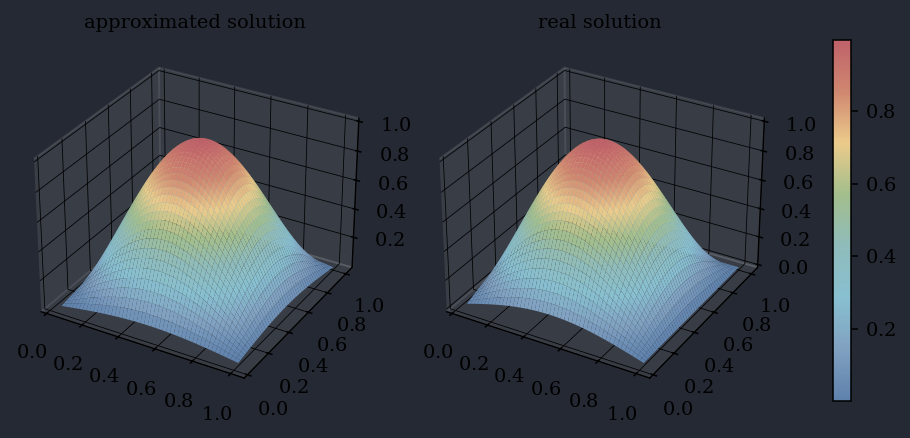

In [41]:
fig, ax = plt.subplots(1,2, subplot_kw={"projection": "3d"}, layout = 'constrained')

surf_1 = ax[0].plot_surface(X[:1:-1, :1:-1],Y[:1:-1, :1:-1],U.reshape((49,49)), cmap = cmap1)
surf_2= ax[1].plot_surface(X[:1:-1, :1:-1],Y[:1:-1, :1:-1],U2, cmap = cmap1)
ax[0].set_title('approximated solution')
ax[1].set_title('real solution')

plt.colorbar(surf_2, orientation = 'vertical')

In [42]:
N = np.array([2**k for k in range(2,8)])
error = []

for num in N : 
    
    X,Y = np.linspace(0,1,num+1), np.linspace(0,1,num+1)
    X,Y = np.meshgrid(X,Y)

    B = 2 * np.pi ** 2 * np.sin(np.pi * X) * np.sin(np.pi * Y)
    U = finite_difference_2D(B)
   
    error.append(np.max(np.abs(U.reshape((num-1,num-1)) - np.sin(np.pi * X[:1:-1, :1:-1]) * np.sin(np.pi * Y[:1:-1, :1:-1]))))

/tmp/ipykernel_24564/1471044624.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')


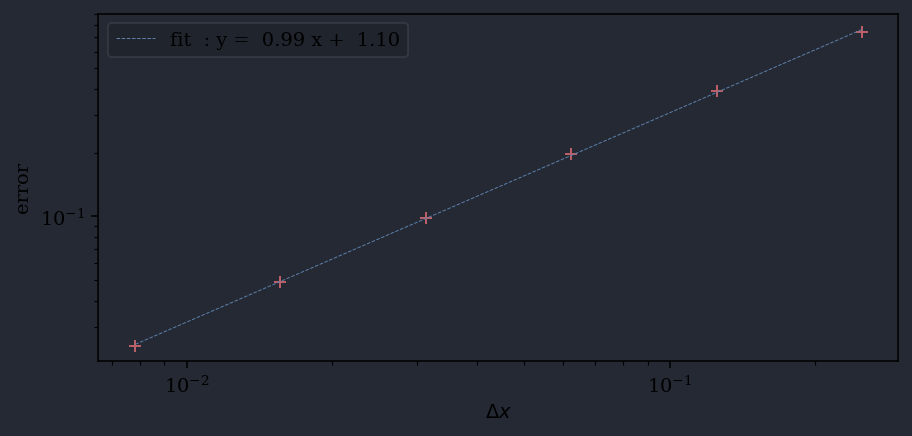

In [43]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, error ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X), np.log(error),  1)

poly = np.poly1d(fit)
ax.plot(Delta_X, np.exp(fit[1])*((Delta_X) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('error')
ax.legend()

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

**Question.** How should the memory cost and the runtime of this program evolve with respect to $N$?

**Answer.**

One can measure the runtime of an algorithm by using successive calls to the with the with the `time` function in the `time` library of <tt>python</tt> (see the [documentation](https://docs.python.org/3/library/time.html#time.time)) as follows:
```
import time

start_time = time.time()

# algorithm whose runtime is to be measured

elapsed_time = time.time() - start_time
```

**Question.** For a reasonable range of values of $N$, plot the elapsed time for the method as function of $N$ using a log-log scale. Is the expected asymptotic trend observed?

In [45]:
import time

N = np.array([2**k for k in range(2,8)])
elapsed_time = []

for num in N : 
    
    X,Y = np.linspace(0,1,num+1), np.linspace(0,1,num+1)
    X,Y = np.meshgrid(X,Y)

    B = 2 * np.pi ** 2 * np.sin(np.pi * X) * np.sin(np.pi * Y)
    start = time.time()
    U = finite_difference_2D(B)
    elapsed_time.append(time.time() - start)
   


/tmp/ipykernel_24564/3672847601.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, elapsed_time ,'o',  color = color[-1], marker = '+')


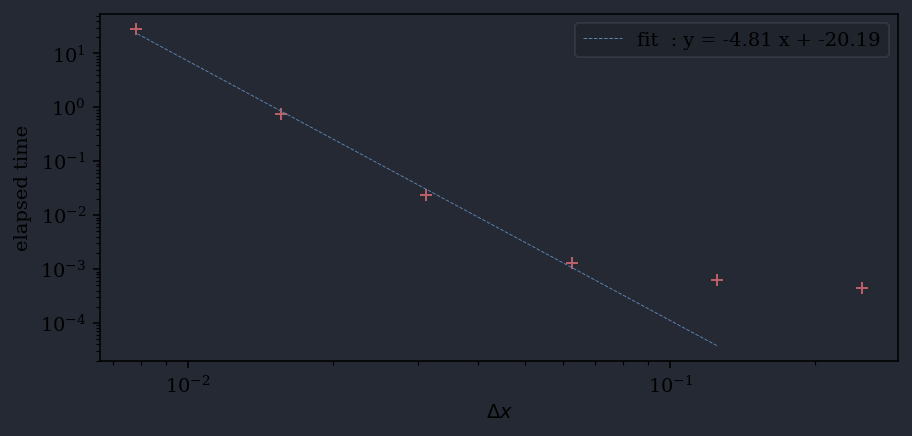

In [46]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, elapsed_time ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X)[2:], np.log(elapsed_time)[2:],  1)

poly = np.poly1d(fit)
ax.plot(Delta_X[1:], np.exp(fit[1])*((Delta_X[1:]) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('elapsed time')
ax.legend()

**Answer.**

The matrix $A$ being a banded matrix with only four non-zero diagonals, the number of non-zero coefficients is highly negligible compared to the number of zero coefficients when $N$ is large. Such a matrix called [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) and it is beneficial, if not necessary, to use specialised algorithms and data structures that take advantage of this property in practice.

The `sparse` library in <tt>scipy</tt> (see the [documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html)) provides functions to properly define and manipulate sparse matrices.

**Question.** Using the <tt>sparse</tt> library, write a function which computes the matrix $A$ and stores it in a Compressed Sparse Column matrix (CSC) data structure, the non-zero natural integer $N$ being an input argument.

In [47]:
import scipy.sparse as sparse

def compute_Poisson_system_sparse(N) : 
    
    Delta_X = (b - a) / N 
    size = (N-1)**2
    
    diag_1 = [1 for k in range(N - 2)]; diag_2 = [-4 for k in range(N-1)]; diag_3 = [1 for k in range(N - 2)]
    
    C = sparse.diags(diag_1, -1) + sparse.diags(diag_2, 0) + sparse.diags(diag_3, 1)
    
    big_diag_1 = sparse.diags([1 for k in range(N - 2)],-1)
    big_diag_2 = sparse.diags([1 for k in range(N - 2)],1)
    
    A = sparse.kron(sparse.identity(N-1), C) + sparse.kron(big_diag_1, sparse.identity(N-1)) + sparse.kron(big_diag_2, sparse.identity(N-1))
   
    return -1 / Delta_X ** 2 * A

**Question.** On the model of the previous program, write a program for solving the Poisson problem using functions taking into account the sparse structure of the matrix (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.splu.html) for the `sparse.linalg.splu` function). Do you observe a difference in the runtime scaling?

In [57]:
from scipy.sparse.linalg import splu

In [58]:
def finite_difference_2D_sparse(B) : 
    
    A = compute_Poisson_system(len(B)-1)
    lu = splu(A)
    U = lu.solve(B[1:-1, 1:-1].flatten())
    
    return U


In [59]:
import time

N = np.array([2**k for k in range(2,8)])
elapsed_time = []

for num in N : 
    
    X,Y = np.linspace(0,1,num+1), np.linspace(0,1,num+1)
    X,Y = np.meshgrid(X,Y)

    B = 2 * np.pi ** 2 * np.sin(np.pi * X) * np.sin(np.pi * Y)
    start = time.time()
    U = finite_difference_2D_sparse(B)
    elapsed_time.append(time.time() - start)

/home/andrea/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


/tmp/ipykernel_24136/3672847601.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.loglog(Delta_X, elapsed_time ,'o',  color = color[-1], marker = '+')


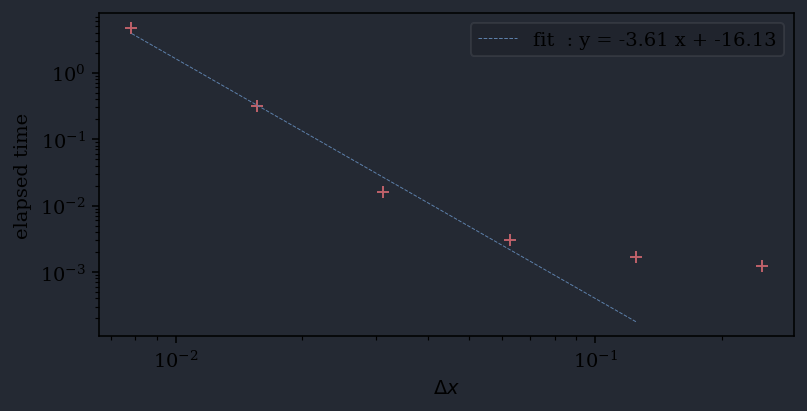

In [60]:
fig, ax = plt.subplots()
Delta_X = 1 / N
ax.loglog(Delta_X, elapsed_time ,'o',  color = color[-1], marker = '+')

fit = np.polyfit(np.log(Delta_X)[2:], np.log(elapsed_time)[2:],  1)

poly = np.poly1d(fit)
ax.plot(Delta_X[1:], np.exp(fit[1])*((Delta_X[1:]) ** (fit[0])), '--', color = color[0], label = f'fit  : y = {fit[0] : .2f} x + {fit[1]: .2f}', lw = .5)
ax.set_xlabel('$\Delta x$')
ax.set_ylabel('elapsed time')
ax.legend()

**Answer.**